# World Data Analysis

In [2]:
import pandas as pd
import numpy as np
import torch
import streamlit
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import matplotlib
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df = df[df['Country/Region'] != 'Diamond Princess']
df = df[df['Country/Region'] != 'MS Zaandam']
df = df.drop(['Province/State'], axis=1)
df = df.reset_index(drop=True)
df

Country/Region        Lat       Long  1/22/20  1/23/20  1/24/20  \
0              Afghanistan  33.000000  65.000000        0        0        0   
1                  Albania  41.153300  20.168300        0        0        0   
2                  Algeria  28.033900   1.659600        0        0        0   
3                  Andorra  42.506300   1.521800        0        0        0   
4                   Angola -11.202700  17.873900        0        0        0   
..                     ...        ...        ...      ...      ...      ...   
259  Sao Tome and Principe   0.186360   6.613081        0        0        0   
260                  Yemen  15.552727  48.516388        0        0        0   
261                Comoros -11.645500  43.333300        0        0        0   
262             Tajikistan  38.861034  71.276093        0        0        0   
263                Lesotho -29.609988  28.233608        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  ...  6/6/20  6/7/20  6/8/20  6/9/20  \
0          0        0        0        0  ...   19551   20342   20917   21459   
1          0        0        0        0  ...    1232    1246    1263    1299   
2          0        0        0        0  ...   10050   10154   10265   10382   
3          0        0        0        0  ...     852     852     852     852   
4          0        0        0        0  ...      88      91      92      96   
..       ...      ...      ...      ...  ...     ...     ...     ...     ...   
259        0        0        0        0  ...     499     513     513     514   
260        0        0        0        0  ...     482     484     496     524   
261        0        0        0        0  ...     141     141     141     141   
262        0        0        0        0  ...    4453    4529    4609    4690   
263        0        0        0        0  ...       4       4       4       4   

     6/10/20  6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  
0      22142    22890    23546    24102    24766    25527  
1       1341     1385     1416     1464     1521     1590  
2      10484    10589    10698    10810    10919    11031  
3        852      852      853      853      853      853  
4        113      118      130      138      140      142  
..       ...      ...      ...      ...      ...      ...  
259      611      632      639      659      661      662  
260      560      591      632      705      728      844  
261      162      162      163      176      176      176  
262     4763     4834     4902     4971     5035     5097  
263        4        4        4        4        4        4  

[264 rows x 149 columns]

In [125]:
df = df.groupby('Country/Region').sum()
df = df.reset_index()

In [126]:
df.loc[df.loc[df['Country/Region']=='US'].index, 'Country/Region']= 'United States of America'
df.loc[df.loc[df['Country/Region']=='United Kingdom'].index, 'Country/Region']= 'United Kingdom of Great Britain and Northern Ireland'
df.loc[df.loc[df['Country/Region']=='Russia'].index, 'Country/Region']= 'Russian Federation'
df.loc[df.loc[df['Country/Region']=='Venezuela'].index, 'Country/Region']= 'Venezuela (Bolivarian Republic of)'
df.loc[df.loc[df['Country/Region']=='Bolivia'].index, 'Country/Region']= 'Bolivia (Plurinational State of)'
df.loc[df.loc[df['Country/Region']=='Taiwan*'].index, 'Country/Region']= 'Taiwan, Province of China'
df.loc[df.loc[df['Country/Region']=='Syria'].index, 'Country/Region']= 'Syrian Arab Republic'
df.loc[df.loc[df['Country/Region']=='Korea, South'].index, 'Country/Region']= 'Korea, Republic of'
df.loc[df.loc[df['Country/Region']=='Iran'].index, 'Country/Region']= 'Iran (Islamic Republic of)'
df.loc[df.loc[df['Country/Region']=='Cote d\'Ivoire'].index, 'Country/Region']= 'Côte d\'Ivoire'
df.loc[df.loc[df['Country/Region']=='Congo (Kinshasa)'].index, 'Country/Region']= 'Congo, Democratic Republic of the'
df.loc[df.loc[df['Country/Region']=='Congo (Brazzaville)'].index, 'Country/Region']= 'Congo'
df.loc[df.loc[df['Country/Region']=='Moldova'].index, 'Country/Region']= 'Moldova, Republic of'
df.loc[df.loc[df['Country/Region']=='Tanzania'].index, 'Country/Region']= 'Tanzania, United Republic of'
df.loc[df.loc[df['Country/Region']=='Brunei'].index, 'Country/Region']= 'Brunei Darussalam'

In [127]:
df2 = pd.read_csv('../data/all.csv')
df2.head()

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [128]:
code2 = []
for i in df['Country/Region']:
    try:
        code2.append(df2[df2['name']==i]['alpha-3'].values[0])
    except:
        print(i)
        code2.append('NA')

df['code'] = code2

Burma
Kosovo
Laos
Vietnam
West Bank and Gaza


In [130]:
df = df.drop(['Lat', 'Long'], axis=1)
df

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0           Afghanistan        0        0        0        0        0        0   
1               Albania        0        0        0        0        0        0   
2               Algeria        0        0        0        0        0        0   
3               Andorra        0        0        0        0        0        0   
4                Angola        0        0        0        0        0        0   
..                  ...      ...      ...      ...      ...      ...      ...   
181  West Bank and Gaza        0        0        0        0        0        0   
182      Western Sahara        0        0        0        0        0        0   
183               Yemen        0        0        0        0        0        0   
184              Zambia        0        0        0        0        0        0   
185            Zimbabwe        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  6/7/20  6/8/20  6/9/20  6/10/20  6/11/20  \
0          0        0        0  ...   20342   20917   21459    22142    22890   
1          0        0        0  ...    1246    1263    1299     1341     1385   
2          0        0        0  ...   10154   10265   10382    10484    10589   
3          0        0        0  ...     852     852     852      852      852   
4          0        0        0  ...      91      92      96      113      118   
..       ...      ...      ...  ...     ...     ...     ...      ...      ...   
181        0        0        0  ...     472     473     481      485      487   
182        0        0        0  ...       9       9       9        9        9   
183        0        0        0  ...     484     496     524      560      591   
184        0        0        0  ...    1089    1200    1200     1200     1200   
185        0        0        0  ...     282     287     314      320      332   

     6/12/20  6/13/20  6/14/20  6/15/20  code  
0      23546    24102    24766    25527   AFG  
1       1416     1464     1521     1590   ALB  
2      10698    10810    10919    11031   DZA  
3        853      853      853      853   AND  
4        130      138      140      142   AGO  
..       ...      ...      ...      ...   ...  
181      489      489      492      505    NA  
182        9        9        9        9   ESH  
183      632      705      728      844   YEM  
184     1321     1357     1358     1382   ZMB  
185      343      356      383      387   ZWE  

[186 rows x 148 columns]

In [131]:
df = df.melt(id_vars=["Country/Region", "code"], 
        var_name="Dates", 
        value_name="Cases")

In [132]:
df.head()

Country/Region code    Dates  Cases
0    Afghanistan  AFG  1/22/20      0
1        Albania  ALB  1/22/20      0
2        Algeria  DZA  1/22/20      0
3        Andorra  AND  1/22/20      0
4         Angola  AGO  1/22/20      0

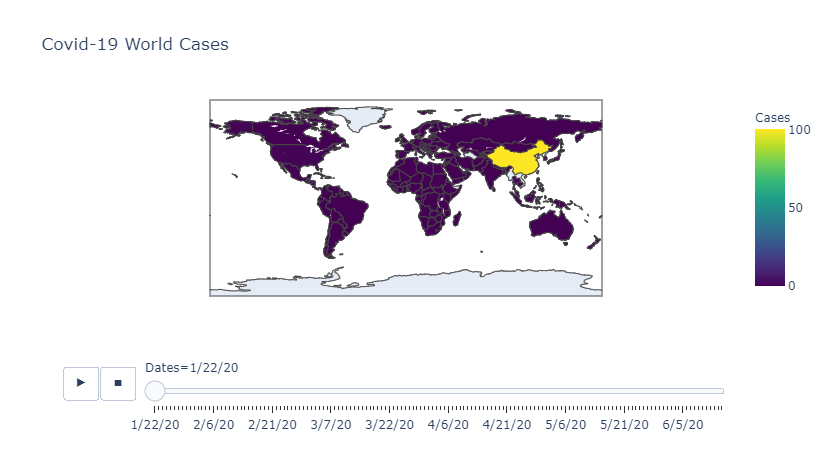

In [133]:
up, low = 100, 0
#up, low = np.inf, np.inf

fig = px.choropleth(df, locations="code", hover_name="Country/Region", 
                    animation_frame="Dates", 
                    color_continuous_scale=px.colors.sequential.Viridis,
                    color="Cases",
                    title="Covid-19 World Cases",
                    range_color=[low,up]) 
fig.show()

In [137]:
def world_map(resources, df2):
    datasets = []
    for link in resources:
        df = pd.read_csv(link)
        df = df[df['Country/Region'] != 'Diamond Princess']
        df = df[df['Country/Region'] != 'MS Zaandam']
        df = df.drop(['Province/State'], axis=1)
        df = df.reset_index(drop=True)
        df = df.groupby('Country/Region').sum()
        df = df.reset_index()
        df.loc[df.loc[df['Country/Region']=='US'].index, 'Country/Region']= 'United States of America'
        df.loc[df.loc[df['Country/Region']=='United Kingdom'].index, 'Country/Region']= 'United Kingdom of Great Britain and Northern Ireland'
        df.loc[df.loc[df['Country/Region']=='Russia'].index, 'Country/Region']= 'Russian Federation'
        df.loc[df.loc[df['Country/Region']=='Venezuela'].index, 'Country/Region']= 'Venezuela (Bolivarian Republic of)'
        df.loc[df.loc[df['Country/Region']=='Bolivia'].index, 'Country/Region']= 'Bolivia (Plurinational State of)'
        df.loc[df.loc[df['Country/Region']=='Taiwan*'].index, 'Country/Region']= 'Taiwan, Province of China'
        df.loc[df.loc[df['Country/Region']=='Syria'].index, 'Country/Region']= 'Syrian Arab Republic'
        df.loc[df.loc[df['Country/Region']=='Korea, South'].index, 'Country/Region']= 'Korea, Republic of'
        df.loc[df.loc[df['Country/Region']=='Iran'].index, 'Country/Region']= 'Iran (Islamic Republic of)'
        df.loc[df.loc[df['Country/Region']=='Cote d\'Ivoire'].index, 'Country/Region']= 'Côte d\'Ivoire'
        df.loc[df.loc[df['Country/Region']=='Congo (Kinshasa)'].index, 'Country/Region']= 'Congo, Democratic Republic of the'
        df.loc[df.loc[df['Country/Region']=='Congo (Brazzaville)'].index, 'Country/Region']= 'Congo'
        df.loc[df.loc[df['Country/Region']=='Moldova'].index, 'Country/Region']= 'Moldova, Republic of'
        df.loc[df.loc[df['Country/Region']=='Tanzania'].index, 'Country/Region']= 'Tanzania, United Republic of'
        df.loc[df.loc[df['Country/Region']=='Brunei'].index, 'Country/Region']= 'Brunei Darussalam'
        code2 = []
        for i in df['Country/Region']:
            try:
                code2.append(df2[df2['name']==i]['alpha-3'].values[0])
            except:
                #print(i)
                code2.append('NA')

        df['code'] = code2
        datasets.append(df)
    return datasets

    
def world_plot(df, up, low, name):
    fig = px.choropleth(df, locations="code", hover_name="Country/Region", 
                        animation_frame="Dates", 
                        color_continuous_scale=px.colors.sequential.Viridis,
                        color="Cases",
                        title="Covid-19 World "+str(name),
                        range_color=[low,up]) 
    fig.show()

In [138]:
df2 = pd.read_csv('../data/all.csv')
up, low = np.inf, 0
resources = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
             'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',
             'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
            ]

data_list = world_map(resources, df2)

In [139]:
for i in range(len(data_list)):
    data_list[i] = data_list[i].drop(
        ['Lat', 'Long'], axis=1)
    data_list[i] = data_list[i].melt(
        id_vars=["Country/Region", "code"],
        var_name="Dates",
        value_name="Cases")

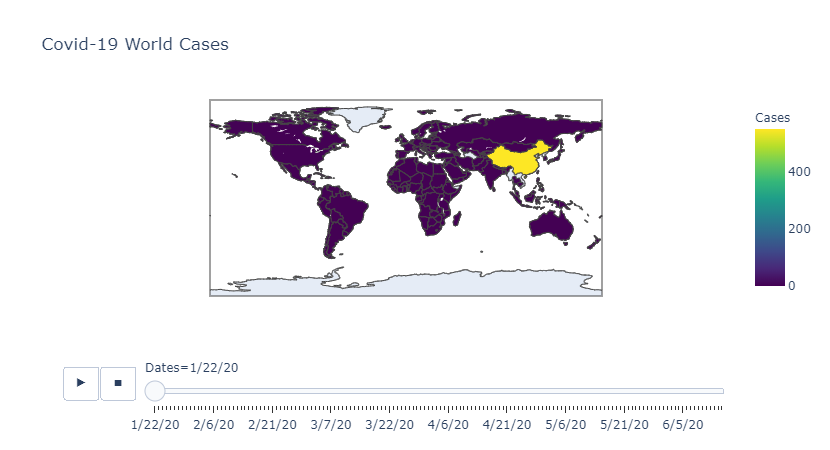

In [140]:
world_plot(data_list[0], up, low, name='Cases')

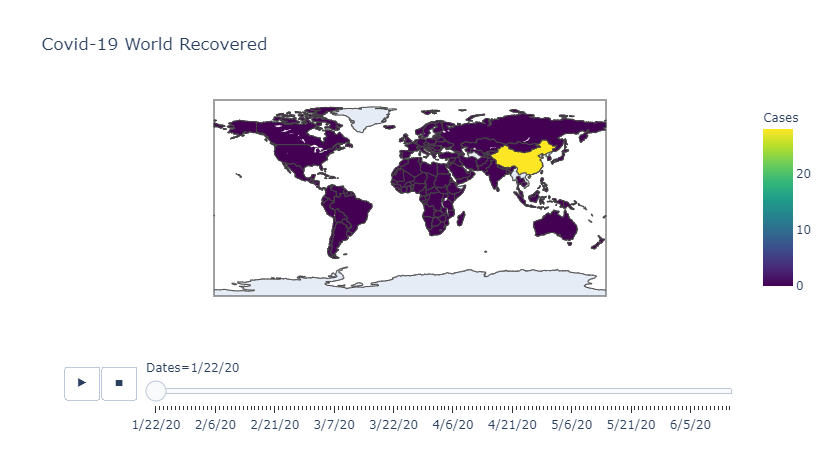

In [141]:
world_plot(data_list[1], up, low, name='Recovered')

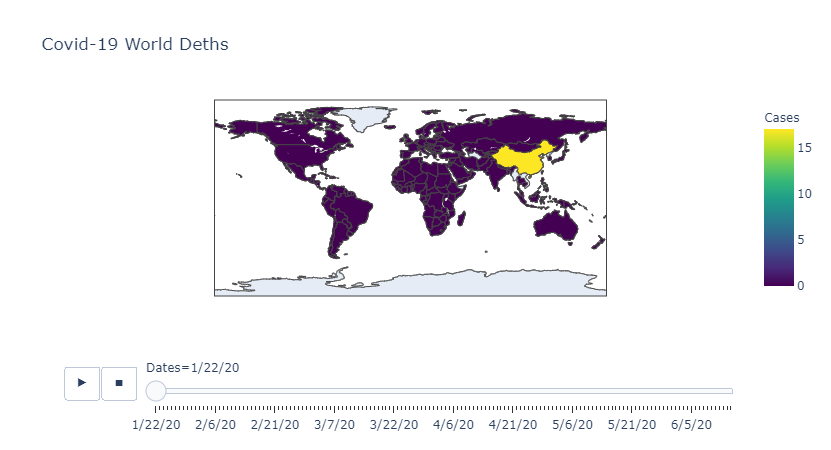

In [142]:
world_plot(data_list[2], up, 0, name='Deths')

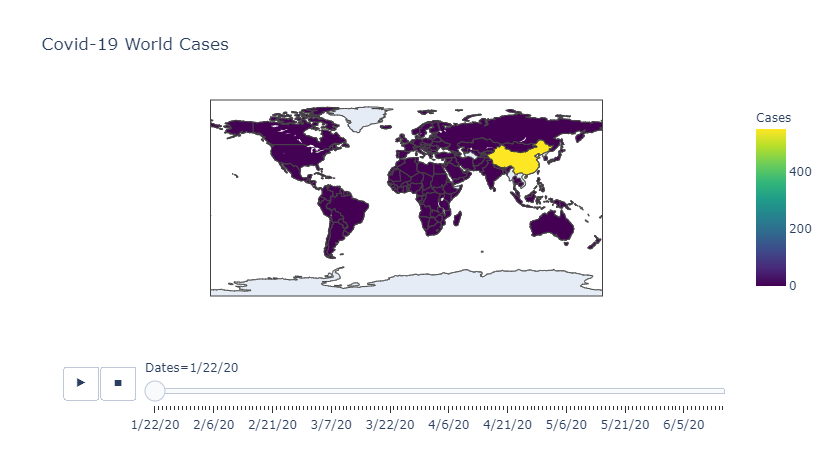

In [143]:
world_plot(data_list[0], 100, np.inf, name='Cases')

In [144]:
data_list[0]

Country/Region code    Dates  Cases
0             Afghanistan  AFG  1/22/20      0
1                 Albania  ALB  1/22/20      0
2                 Algeria  DZA  1/22/20      0
3                 Andorra  AND  1/22/20      0
4                  Angola  AGO  1/22/20      0
...                   ...  ...      ...    ...
27151  West Bank and Gaza   NA  6/15/20    505
27152      Western Sahara  ESH  6/15/20      9
27153               Yemen  YEM  6/15/20    844
27154              Zambia  ZMB  6/15/20   1382
27155            Zimbabwe  ZWE  6/15/20    387

[27156 rows x 4 columns]

In [145]:
totay_cases = data_list[0][data_list[0]['Dates']==data_list[0]['Dates'].unique()[::-1][0]]
today_deths = data_list[2][data_list[2]['Dates']==data_list[2]['Dates'].unique()[::-1][0]]
today = pd.merge(totay_cases, today_deths, left_on='Country/Region', right_on='Country/Region', how='inner')
today.loc[today.loc[today['Country/Region']=='United Kingdom of Great Britain and Northern Ireland'].index, 'Country/Region'] = 'United Kingdom'
today_top = today.sort_values(by='Cases_y', ascending=False)[:10]
yest_cases = data_list[0][data_list[0]['Dates']==data_list[0]['Dates'].unique()[::-1][1]]
yest_deths = data_list[2][data_list[2]['Dates']==data_list[2]['Dates'].unique()[::-1][1]]
yest = pd.merge(yest_cases, yest_deths, left_on='Country/Region', right_on='Country/Region', how='inner')
yest.loc[yest.loc[yest['Country/Region']=='United Kingdom of Great Britain and Northern Ireland'].index, 'Country/Region'] = 'United Kingdom'
yest_top = yest.sort_values(by='Cases_y', ascending=False)[:10]
res = pd.merge(today_top, yest_top, left_on='Country/Region', right_on='Country/Region', how='inner')
last_cases = res['Cases_x_x'] - res['Cases_x_y']
last_deths = res['Cases_y_x'] - res['Cases_y_y']

In [146]:
def stats(countries, infected, died, title):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
    fig.set_size_inches(18.5, 10.5)

    x = list(countries.values)

    n_cases = list(infected.values)
    ax[0].barh(x, n_cases, color='green')
    ax[0].set_xlabel("Number of Cases", fontsize=25)

    n_deths = list(died.values)
    ax[1].barh(x, n_deths, color='green')
    ax[1].set_xlabel("Number of Deths", fontsize=25)

    ax[1].set_yticks(x, [])
    ax[1].invert_yaxis()
    ax[0].set_yticklabels(x, fontsize=22)

    ax[0].tick_params(axis="x", labelsize=20, rotation=30)
    ax[1].tick_params(axis="x", labelsize=20, rotation=30)
    ax[0].get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax[1].get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    fig.suptitle(title, fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)
    plt.show()

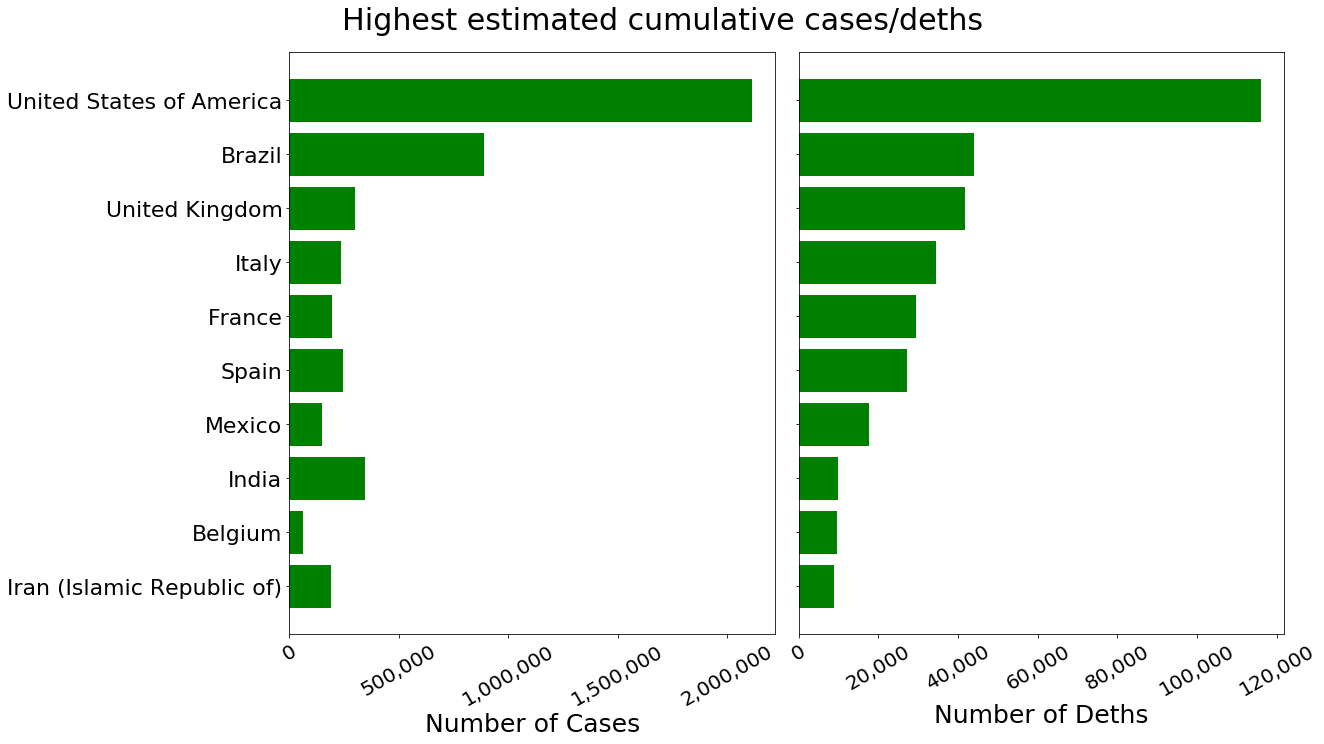

In [147]:
stats(today_top['Country/Region'], today_top['Cases_x'], 
      today_top['Cases_y'], "Highest estimated cumulative cases/deths")

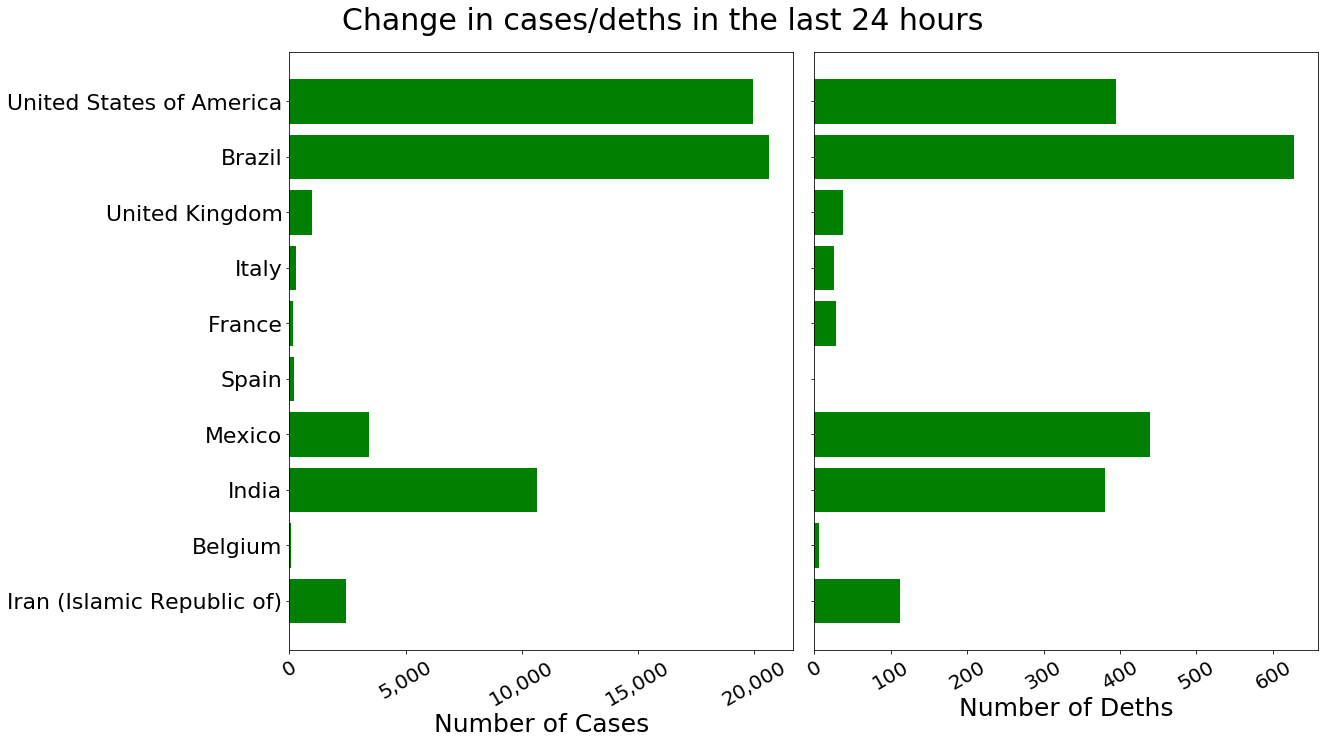

In [148]:
stats(res['Country/Region'], last_cases, 
      last_deths, "Change in cases/deths in the last 24 hours")

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df = df[df['Country/Region'] != 'Diamond Princess']
df = df[df['Country/Region'] != 'MS Zaandam']
df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  \
0        0        0        0  ...   19551   20342   20917   21459    22142   
1        0        0        0  ...    1232    1246    1263    1299     1341   
2        0        0        0  ...   10050   10154   10265   10382    10484   
3        0        0        0  ...     852     852     852     852      852   
4        0        0        0  ...      88      91      92      96      113   

   6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  
0    22890    23546    24102    24766    25527  
1     1385     1416     1464     1521     1590  
2    10589    10698    10810    10919    11031  
3      852      853      853      853      853  
4      118      130      138      140      142  

[5 rows x 150 columns]

In [82]:
message = df["Country/Region"] + "<br>"
message += "Confirmed: " + df.iloc[:,-1].astype(str)
df["text"] = message

In [83]:
df.iloc[:,-2]

0      25527
1       1590
2      11031
3        853
4        142
       ...  
261      662
262      844
263      176
264     5097
265        4
Name: 6/15/20, Length: 264, dtype: int64

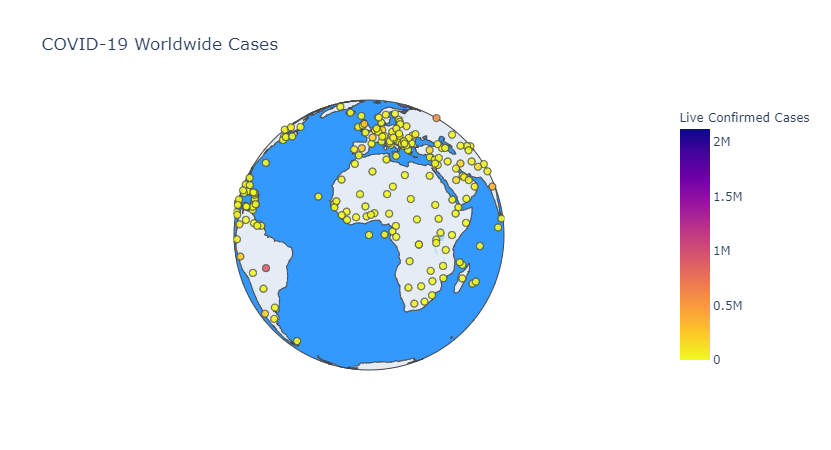

In [84]:
fig= go.Figure(data=go.Scattergeo(
    locationmode = "country names",
    lon = df["Long"],
    lat = df["Lat"],
    hovertext = df["text"],
    showlegend=False,
    marker = dict(
        size = 7,
        opacity = 0.9,
        reversescale = True,
        autocolorscale = True,
        line = dict(
            width=1,
        ),
        cmin = 0,
        color = df.iloc[:,-2],
        cmax = max(df.iloc[:,-2]),
        colorbar_title="Live Confirmed Cases",  
    )),
) 

fig.update_layout(
    title = "COVID-19 Worldwide Cases",
    showlegend=True,
    legend=dict(x=0.65, y=0.8),
    geo = dict(
            projection_type="orthographic",
            showcoastlines=True,
            showland= True,
            showocean = True,
            lakecolor="LightBlue"
    ),
)

fig.show()

In [85]:
sum(df.iloc[:,-2])

8033740

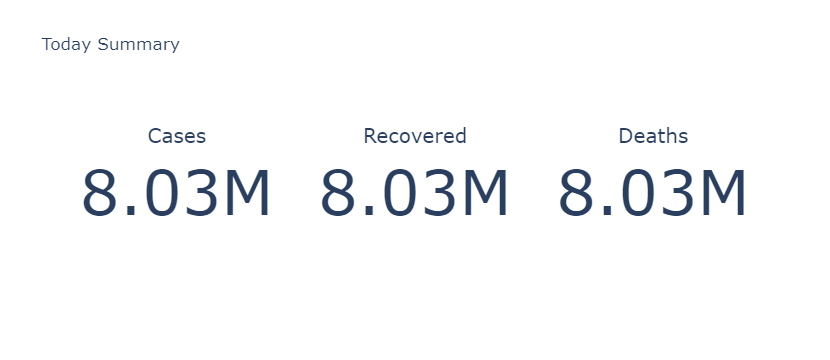

In [86]:
fig = make_subplots(rows=1, cols=3,
                   specs=[[{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}]])

fig.add_trace(
    go.Indicator(
        mode="number",
        value=sum(df.iloc[:,-2]),
        title="Cases",
    ),
    row=1, col=1
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=sum(df.iloc[:,-2]),
        title="Recovered",
    ),
    row=1, col=2
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=sum(df.iloc[:,-2]),
        title="Deaths",
    ),
    row=1, col=3
)

fig.update_layout(height=200, width=600, title_text="Today Summary")
fig.show()